In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt
from example import plotting, example5, example6
%matplotlib inline

# plotting 함수
n_observations = 500

# Data processing
## #1 데이터 확보 (Download, Generate, etc.)
## #2 데이터 전처리

## Training example 1
### <center>\\(y = sin(x)+\epsilon \\) </center>

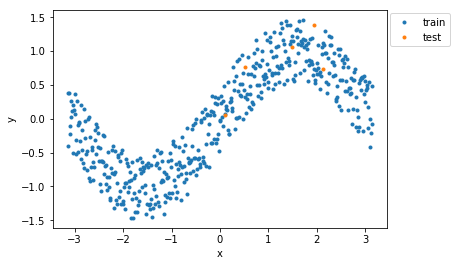

In [2]:
train_X, train_Y, test_X, test_Y, whole_X, whole_Y = example5(False, n_observations, np.pi, 0.01)
plotting([train_X, test_X], [train_Y, test_Y], label=['train', 'test'])

## Training example 2
### <center>\\(y = -x-sin(x)+\epsilon \\) </center>

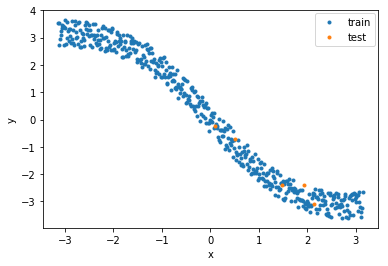

In [3]:
train_X, train_Y, test_X, test_Y, whole_X, whole_Y = example6(False, n_observations, np.pi, 0.01)
plotting([train_X, test_X], [train_Y, test_Y], label=['train', 'test'])

# Linear Regression
## Function Form
### <center>\\(y = Wx+b \\) </center>
## Loss Function : (Mean Square Error)
### <center> \\( L(y^*, y) = \frac{1}{2n}\sum_{i=1}^n||y^*_i - y_i||^2\\) </center>

## #1 Loss function 정의

In [4]:
def get_ms_loss(y_true, y_pred, n_observations):
    """
    Args
     - y_true : actual value of y
     - y_pred : prediction of y from our model
     - a,b : meaningless arguments
    Returns
     - loss : our loss (MSE)
    
    Hint : tf.reduce_sum or tf.square, tf.sum
    """
    with tf.name_scope('mean_square'):
        loss = tf.reduce_mean(tf.square(y_true-y_pred), axis=0)
    return loss

## #2 Regressor model 정의

In [5]:
def linear_model(x, a=None):
    """
    Args
     - x : input
     - a : meaningless parameter
    Returns
     - y_pred : model result
     - weights : meaningless return
    
    Hint : tf.Variable, 
    """
    with tf.name_scope('linear'):
        weight = tf.get_variable('weight', [1], tf.float32, initializer=tf.truncated_normal_initializer(stddev=0.02))
        bias = tf.Variable(tf.zeros(1), name='biases')
        y_pred = tf.add(tf.multiply(x,weight),bias) 
    return y_pred

## #3 Hyper-parameter 설정

In [6]:
def hyper_param(learning_rate = 1e-2, max_iter=1000, n_observations=500, degree=1):
    return {'learning_rate':learning_rate,
            'max_iter':max_iter,
            'n_observations':n_observations,
            'iter':[int(max_iter/3),int(max_iter*2/3), int(max_iter)],
            'degree':degree}

hyper = hyper_param(max_iter=100)

## #4 Network 구성
### (1) Placeholder 설정
### (2) Loss function 선언
### (3) Model 정의
### (4) Optimizer 선언 및 Variable 초기화

# #5 Training and Analysis

In [7]:
"""
Hint : tf.placeholder, tf.train.GradientDescentOptimizer(), tf.global_variables_initializer()
"""
def training_analysis(model_function, loss_function, example_function, hyper):

    x = tf.placeholder(tf.float32, [None], name='input')
    y_true = tf.placeholder(tf.float32, [None], name='y_true')
    y_pred = model_function(x, hyper['degree'])

    loss = loss_function(y_true, y_pred, hyper['n_observations'])

    train_step = tf.train.GradientDescentOptimizer(hyper['learning_rate']).minimize(loss)
    with tf.Session() as sess:
        """
            Training
        """
        train_x, train_y, test_x, test_y, whole_x, whole_y = example_function(False, hyper['n_observations'], np.pi, 0.01)
        train_x = np.squeeze(train_x)
        sess.run(tf.global_variables_initializer())
        for step in range(hyper['max_iter']):
            _,train_loss = sess.run([train_step, loss], feed_dict={x:train_x, y_true:train_y})
            if (step+1) % 100 == 0:
                test_loss = sess.run(loss, feed_dict={x:np.squeeze(test_x), y_true:test_y})
                print("{}th iteration, train_loss: {:.4f}, test_loss: {:.4f}".format(step + 1, train_loss, test_loss))
            """
                Analysis
            """     
            if step == hyper['iter'][0]:
                pred_1 = sess.run(y_pred, feed_dict={x:train_x, y_true:train_y})
            if step == hyper['iter'][1]:
                pred_2 = sess.run(y_pred, feed_dict={x:train_x, y_true:train_y})
        pred_3 = sess.run(y_pred, feed_dict={x:train_x, y_true:train_y})
    tf.reset_default_graph()
    return [pred_1, pred_2, pred_3]

def legend(hyper):
    label = ['train','test']
    for i in hyper['iter']:
        label.append('iter_'+str(i))
    return label

100th iteration, train_loss: 0.5222, test_loss: 0.7696
200th iteration, train_loss: 0.4908, test_loss: 0.7283
300th iteration, train_loss: 0.4633, test_loss: 0.6908
400th iteration, train_loss: 0.4392, test_loss: 0.6567
500th iteration, train_loss: 0.4181, test_loss: 0.6258
600th iteration, train_loss: 0.3997, test_loss: 0.5977
700th iteration, train_loss: 0.3835, test_loss: 0.5721
800th iteration, train_loss: 0.3693, test_loss: 0.5488
900th iteration, train_loss: 0.3569, test_loss: 0.5275
1000th iteration, train_loss: 0.3461, test_loss: 0.5080


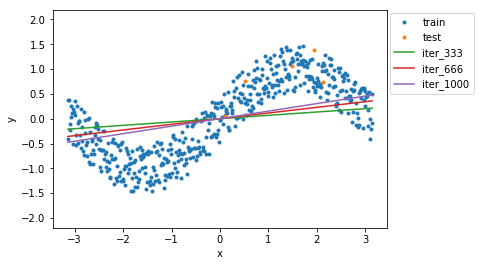

In [8]:
hyper = hyper_param(max_iter=1000, learning_rate=1e-4)
y_pred_ms_1 = training_analysis(linear_model, get_ms_loss, example5, hyper)
train_x, train_y, test_x, test_y, whole_x, whole_y = example5(False, n_observations, np.pi, 0.01)
plotting([train_x, test_x]+[train_x for i in range(len(y_pred_ms_1))], [train_y,test_y]+y_pred_ms_1, label=legend(hyper))

100th iteration, train_loss: 5.0253, test_loss: 3.7453
200th iteration, train_loss: 4.4370, test_loss: 3.3272
300th iteration, train_loss: 3.9218, test_loss: 2.9585
400th iteration, train_loss: 3.4706, test_loss: 2.6335
500th iteration, train_loss: 3.0755, test_loss: 2.3467
600th iteration, train_loss: 2.7294, test_loss: 2.0935
700th iteration, train_loss: 2.4263, test_loss: 1.8700
800th iteration, train_loss: 2.1609, test_loss: 1.6725
900th iteration, train_loss: 1.9284, test_loss: 1.4979
1000th iteration, train_loss: 1.7248, test_loss: 1.3434


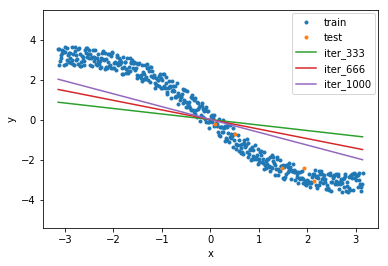

In [9]:
y_pred_ms_2 = training_analysis(linear_model, get_ms_loss, example6, hyper)
train_x, train_y, test_x, test_y, whole_x, whole_y = example6(False, n_observations, np.pi, 0.01)
plotting([train_x, test_x]+[train_x for i in range(len(y_pred_ms_2))], [train_y,test_y]+y_pred_ms_2, label=legend(hyper))

# Nonlinear Regression
## Function Form
### <center>\\(y = W\Phi(x)+b \\) </center>
## Mean Square Loss
### <center> \\( L(y^*, y) = \frac{1}{2n}\sum_{i=1}^n||y^*_i - y_i||^2\\) </center>

In [10]:
def nonlinear_model(x, degree):
    """
    Args
     - x : input
     - degree : degree of polynomial
    Returns
     - y_pred : model result
     - weights : for L2 regularization.
    
    Hint : tf.Variable, 
    """
    
    with tf.name_scope('polynomial'):
        bias = tf.Variable(tf.random_normal([1]), name='biases')
        y_pred = tf.add(0., bias)
        for i in range(degree):
            w = tf.get_variable('weight{}'.format(i), [1], tf.float32, initializer=tf.truncated_normal_initializer(stddev=0.02))
            y_pred = tf.add(tf.multiply(w,tf.pow(x,i+1)), y_pred)
    return y_pred

In [16]:
hyper = hyper_param(learning_rate = 25e-4, max_iter=1000, degree=3)

100th iteration, train_loss: 0.4542, test_loss: 0.9451
200th iteration, train_loss: 0.3121, test_loss: 0.6510
300th iteration, train_loss: 0.2248, test_loss: 0.4606
400th iteration, train_loss: 0.1710, test_loss: 0.3360
500th iteration, train_loss: 0.1378, test_loss: 0.2536
600th iteration, train_loss: 0.1173, test_loss: 0.1984
700th iteration, train_loss: 0.1047, test_loss: 0.1608
800th iteration, train_loss: 0.0968, test_loss: 0.1349
900th iteration, train_loss: 0.0919, test_loss: 0.1168
1000th iteration, train_loss: 0.0888, test_loss: 0.1040


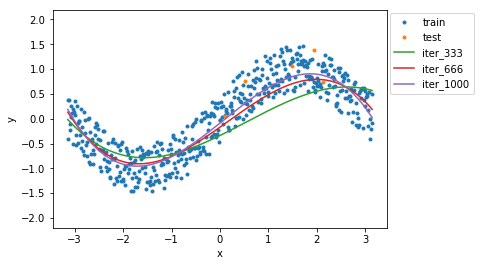

In [17]:
poly_1= training_analysis(nonlinear_model, get_ms_loss, example5, hyper)
train_x, train_y, test_x, test_y, whole_x, whole_y = example5(False, n_observations, np.pi,0.01)
plotting([train_x, test_x]+[train_x for i in range(len(poly_1))], [train_y, test_y]+poly_1, label=legend(hyper))

100th iteration, train_loss: 1.4464, test_loss: 1.8033
200th iteration, train_loss: 0.9125, test_loss: 1.0569
300th iteration, train_loss: 0.5889, test_loss: 0.6154
400th iteration, train_loss: 0.3926, test_loss: 0.3570
500th iteration, train_loss: 0.2733, test_loss: 0.2079
600th iteration, train_loss: 0.2007, test_loss: 0.1238
700th iteration, train_loss: 0.1565, test_loss: 0.0779
800th iteration, train_loss: 0.1295, test_loss: 0.0542
900th iteration, train_loss: 0.1130, test_loss: 0.0431
1000th iteration, train_loss: 0.1029, test_loss: 0.0391


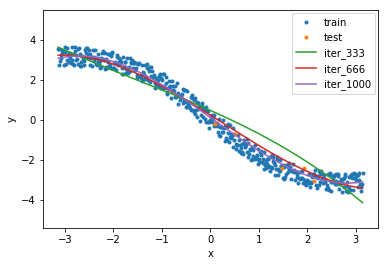

In [18]:
poly_2= training_analysis(nonlinear_model, get_ms_loss, example6, hyper)
train_x, train_y, test_x, test_y, whole_x, whole_y = example6(False, n_observations, np.pi,0.01)
plotting([train_x, test_x]+[train_x for i in range(len(poly_2))], [train_y, test_y]+poly_2, label=legend(hyper))